In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [8]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [9]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target'] = iris.target

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df['target'].unique()

array([0, 1, 2])

In [14]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [44]:
X = df.iloc[ :, :-1]
y = df.iloc[: , -1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [46]:
model = DecisionTreeClassifier() # Default criterion is gini
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
from sklearn import tree

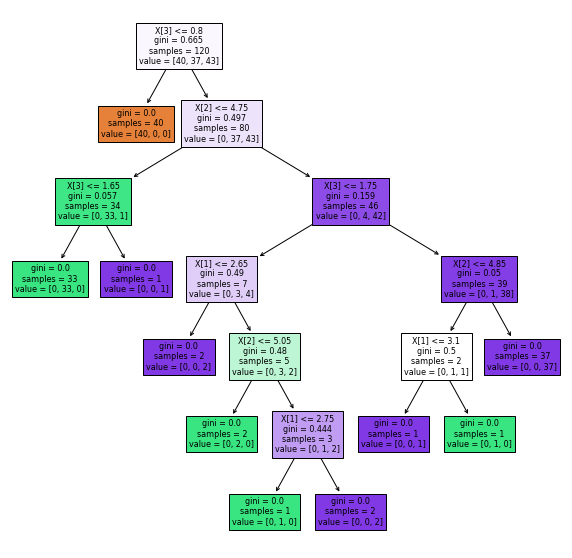

In [48]:
plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled = True);
# In first tree value of gini is > 0.5 ie. 0.667
# There is some miscalculation in it.

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
confusion_matrix(y_test, model.predict(X_test))

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]], dtype=int64)

In [53]:
accuracy_score(y_test, model.predict(X_test))

0.9666666666666667

In [54]:
# Getting the 96% of accuracy

## Hyperparameter tunning

In [55]:
from sklearn.model_selection import GridSearchCV

In [79]:
md = DecisionTreeClassifier()
params = [{'criterion':['gini', 'entropy']}, {'max_depth':[3,4,5,7,8,9,10]}, {'max_features':[3, 4, 10]}]
dt = GridSearchCV(md, param_grid=params, verbose=1, cv = 5)

In [81]:
dt.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 3

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy']},
                         {'max_depth': [3, 4, 5, 7, 8, 9, 10]},
                         {'max_features': [3, 4, 10]}],
             verbose=1)

In [83]:
dt.best_params_, dt.best_score_

({'max_depth': 3}, 0.9333333333333332)

In [84]:
# Here only getting only 93% of accuracy

In [85]:
confusion_matrix(y_test, dt.predict(X_test))

array([[10,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  7]], dtype=int64)

In [86]:
# Check using randomforesetclassifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(accuracy_score(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))

1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [98]:
# Try using logisticregression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
print(accuracy_score(y_test, lg.predict(X_test)))
print(confusion_matrix(y_test, lg.predict(X_test)))

1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [95]:
# 100% percent achievement

# Completed!